# Stock prices dataset
The data is of tock exchange's stock listings for each trading day of 2010 to 2016.

## Description
A brief description of columns.
- open: The opening market price of the equity symbol on the date
- high: The highest market price of the equity symbol on the date
- low: The lowest recorded market price of the equity symbol on the date
- close: The closing recorded price of the equity symbol on the date
- symbol: Symbol of the listed company
- volume: Total traded volume of the equity symbol on the date
- date: Date of record

In this assignment, we will work on the stock prices dataset named "prices.csv". Task is to create a Neural Network to classify closing price for a stock based on some parameters.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

## Question 1

### Load the data
- load the csv file and read it using pandas
- file name is prices.csv

In [ ]:
# run this cell to upload file using GUI if you are using google colab

#from google.colab import files
#files.upload()

In [2]:
#Import basic packages
import pandas as pd
import numpy as np

In [3]:
dfPrices = pd.read_csv('/content/drive/MyDrive/LablFiles/ANN_Internal_Lab/prices dataset NNDL.csv')

In [4]:
dfPrices.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [5]:
dfPrices.shape

(851264, 7)

In [6]:
dfPrices.isna().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [9]:
#As per above result dataset does not have any null values

In [ ]:
#Lets check some data

In [7]:
dfPrices['symbol'].value_counts()

PCLN    1762
AGN     1762
WMB     1762
CNC     1762
CSCO    1762
        ... 
PYPL     378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: symbol, Length: 501, dtype: int64

In [ ]:
# There are 501 different symbols (companies)

## Question 2

### Drop null
- Drop null values if any

In [8]:
#check if there are any nul values
dfPrices.isna().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [9]:
dfPricess = dfPrices.dropna()

### Drop columns
- Now, we don't need "date", "volume" and "symbol" column
- drop "date", "volume" and "symbol" column from the data


In [10]:
dfPrices.drop(columns={'date','volume','symbol'}, axis=1, inplace=True)

In [11]:
dfPrices.dtypes

open     float64
close    float64
low      float64
high     float64
dtype: object

## Question 3

### Print the dataframe
- print the modified dataframe

In [12]:
dfPrices.head()

,open,close,low,high
0,123.430000,125.839996,122.309998,126.250000
1,125.239998,119.980003,119.940002,125.540001
2,116.379997,114.949997,114.930000,119.739998
3,115.480003,116.620003,113.500000,117.440002
4,117.010002,114.970001,114.089996,117.330002


### Get features and label from the dataset in separate variable
- Let's separate labels and features now. We are going to predict the value for "close" column so that will be our label. Our features will be "open", "low", "high"
- Take "open" "low", "high" columns as features
- Take "close" column as label

In [13]:
from sklearn.model_selection import train_test_split 

In [14]:
#Lets first take back up 
dfPrices_backup = dfPrices.copy()

In [15]:
#Lets create feature and target

In [16]:
X = dfPrices.drop('close',axis=1)
y= dfPrices['close']

## Question 4

### Create train and test sets
- Split the data into training and testing

In [17]:
seed_val = 5

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=seed_val)

## Question 5

### Scaling
- Scale the data (features only)
- Use StandarScaler

In [19]:
#Lets standardize the data
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Question 6

### Convert data to NumPy array
- Convert features and labels to numpy array

In [21]:
y_train = np.array(y_train)
y_test = np.array(y_test)

## Question 7

### Define Model
- Initialize a Sequential model
- Add a Flatten layer
- Add a Dense layer with one neuron as output
  - add 'linear' as activation function


In [22]:
# import tensor flow packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout, Conv2D

In [23]:
model = Sequential ([Flatten(), Dense(1,activation='linear')])

## Question 8

### Compile the model
- Compile the model
- Use "sgd" optimizer
- for calculating loss, use mean squared error

In [24]:
model.compile(loss='mean_squared_error',optimizer='sgd')

## Question 9

### Fit the model
- epochs: 50
- batch size: 128
- specify validation data

In [25]:
epoch = 50
batchsize = 128
model.fit(X_train,y_train,batch_size=batchsize,epochs=epoch, validation_data=(X_test,y_test))

Epoch 1/50
4988/4988 [==============================] - 6s 1ms/step - loss: 230.4160 - val_loss: 1.0079
Epoch 2/50
4988/4988 [==============================] - 6s 1ms/step - loss: 0.9922 - val_loss: 1.0000
Epoch 3/50
4988/4988 [==============================] - 5s 1ms/step - loss: 0.9482 - val_loss: 0.9963
Epoch 4/50
4988/4988 [==============================] - 6s 1ms/step - loss: 0.9611 - val_loss: 0.9885
Epoch 5/50
4988/4988 [==============================] - 6s 1ms/step - loss: 0.9466 - val_loss: 1.0051
Epoch 6/50
4988/4988 [==============================] - 6s 1ms/step - loss: 0.9206 - val_loss: 1.0007
Epoch 7/50
4988/4988 [==============================] - 6s 1ms/step - loss: 0.9295 - val_loss: 0.9925
Epoch 8/50
4988/4988 [==============================] - 6s 1ms/step - loss: 0.9167 - val_loss: 0.9795
Epoch 9/50
4988/4988 [==============================] - 6s 1ms/step - loss: 0.9036 - val_loss: 0.9497
Epoch 10/50
4988/4988 [==============================] - 6s 1ms/step - loss: 0.9

## Question 10

### Evaluate the model
- Evaluate the model on test data

In [26]:
model.evaluate(X_test, y_test)

6651/6651 [==============================] - 5s 742us/step - loss: 0.7335


0.7334814667701721

### Manual predictions
- Test the predictions on manual inputs
- We have scaled out training data, so we need to transform our custom inputs using the object of the scaler
- Example of manual input: [123.430000,	122.30999, 116.250000]

In [27]:
y_pred = model.predict(scaler.transform([[123.430000, 122.30999, 116.250000]]))

In [28]:
y_pred

array([[119.77585]], dtype=float32)

# Build a DNN

### Collect Fashion mnist data from tf.keras.datasets 

In [93]:
import tensorflow as tf

In [94]:
(XTrain, YTrain),(xtest,ytest) = tf.keras.datasets.fashion_mnist.load_data()

### Change train and test labels into one-hot vectors

In [95]:
Y_Train = tf.keras.utils.to_categorical(YTrain)
y_test = tf.keras.utils.to_categorical(ytest)

### Build the Graph

### Initialize model, reshape & normalize data

In [96]:
#Lets normalize the data
XTrain = XTrain/255
xtest = xtest/255

In [97]:
#Lets create model...as part of model building we can reshape data
model1 = Sequential()

In [98]:
model1.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model1.add(tf.keras.layers.BatchNormalization())


### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [99]:
noofclasses = y_test.shape[1]
model1.add(Dense(200, activation='relu', input_shape=(784,)))
model1.add(Dense(100, activation='relu'))
model1.add(Dropout(0.25))

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

###Also add callback, such that if validation loss doesn't decreases consecutively 2 times, stop the training

In [100]:
model1.add(Dense(noofclasses, activation='softmax'))

### Print model summary

In [101]:
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] , )
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
dense_10 (Dense)             (None, 200)               157000    
_________________________________________________________________
dense_11 (Dense)             (None, 100)               20100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1010      
Total params: 181,246
Trainable params: 179,678
Non-trainable params: 1,568
____________________________________________

In [102]:
#Early stopping if validation error (val_acc) does not descreases 2 times consecutively
from tensorflow.keras.callbacks import EarlyStopping
stopEarly = EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='auto')
callbackFuns = [stopEarly]
epochs =10

###Train your model, use test data as validation set

In [109]:
history = model1.fit(XTrain, Y_Train, validation_data=(xtest, y_test), epochs=epochs, 
          batch_size=32 , callbacks=callbackFuns)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2712 - accuracy: 0.8977 - val_loss: 0.3352 - val_accuracy: 0.8861
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2594 - accuracy: 0.9012 - val_loss: 0.3405 - val_accuracy: 0.8837
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2502 - accuracy: 0.9047 - val_loss: 0.3329 - val_accuracy: 0.8863
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2404 - accuracy: 0.9076 - val_loss: 0.3458 - val_accuracy: 0.8855
Epoch 5/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2331 - accuracy: 0.9118 - val_loss: 0.3429 - val_accuracy: 0.8868
Epoch 00005: early stopping


###Predict Labels

In [110]:
y_predict = np.argmax(model1.predict(xtest),axis=-1)

###Print Confusion matrix

In [111]:
from sklearn.metrics import confusion_matrix

In [112]:
confusion_matrix(ytest, y_predict)

array([[897,   0,  12,  27,   2,   3,  54,   0,   5,   0],
       [  2, 966,   0,  27,   2,   0,   2,   0,   1,   0],
       [ 18,   1, 850,  15,  66,   0,  48,   0,   2,   0],
       [ 24,   1,  12, 935,  16,   0,   8,   0,   4,   0],
       [  1,   0, 115,  52, 777,   0,  51,   0,   4,   0],
       [  0,   0,   0,   0,   0, 977,   0,  19,   0,   4],
       [189,   0, 102,  30,  67,   0, 607,   0,   5,   0],
       [  0,   0,   0,   0,   0,  26,   0, 957,   0,  17],
       [  6,   0,   4,   5,   3,   4,   9,   4, 965,   0],
       [  0,   0,   0,   0,   0,  12,   1,  50,   0, 937]])

###Plot training accuracy vs validation accuracy
###Plot training loss vs validation loss

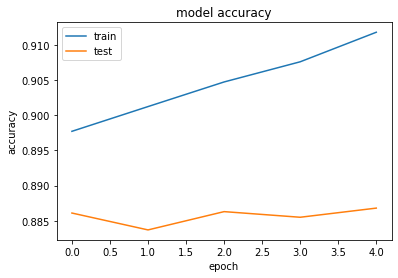

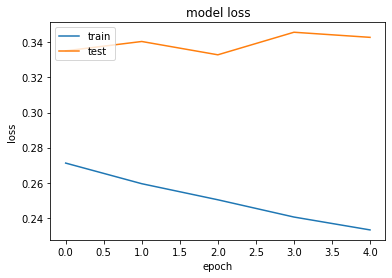

In [113]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
